#Handling Imbalace Data

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [73]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [74]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/14_imbalanced/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6219,1496-GGSUK,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,25.70,25.7,Yes
5633,1222-LRYKO,Male,0,No,Yes,6,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.35,184.05,No
1469,5394-SVGJV,Male,0,No,No,37,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,Yes
5770,6252-DFGTK,Female,0,Yes,No,37,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,No,Credit card (automatic),68.10,2479.25,No
2899,6164-HAQTX,Male,0,No,No,71,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),53.95,3888.65,No


In [75]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [76]:
517400/df.shape[0]

73.46301292063042

In [77]:
df.drop('customerID',axis='columns',inplace=True)

In [78]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [80]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [81]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [82]:
df.shape

(7043, 20)

In [83]:
df.iloc[488].TotalCharges

' '

In [84]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [85]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [86]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [88]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [89]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

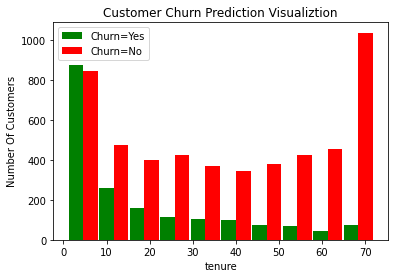

In [90]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

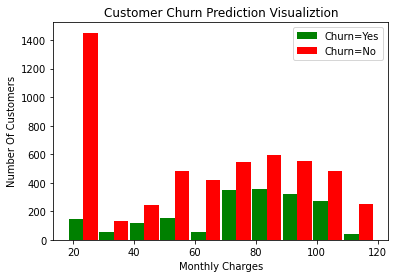

In [91]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [92]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [93]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [94]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [95]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [96]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [97]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [98]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [99]:
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [100]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [101]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4171,0,0,0,0,9,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6514,0,0,1,0,72,0,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
4963,0,0,1,0,47,1,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
6951,0,0,0,0,49,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4819,0,0,0,1,53,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [102]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [103]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [104]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [105]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [106]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [107]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [108]:
5163/1869

2.7624398073836276

In [109]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [110]:
X_train.shape

(5625, 26)

In [111]:
X_test.shape

(1407, 26)

In [112]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [113]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [114]:
!pip install tensorflow-addons==0.16.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from tensorflow_addons import losses

In [116]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [117]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [118]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7515
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7868
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7941
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8005
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8030
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4123 - accuracy: 0.8023
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4107 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4094 - accura

##Method 1: Undersampling

In [119]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [121]:
count_class_0, count_class_1

(5163, 1869)

In [122]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [123]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [124]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [125]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6249 - accuracy: 0.6883
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7615
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7712
Epoch 11/

##Method2: Oversampling

In [126]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [127]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [128]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.7023
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.7603
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4858 - accuracy: 0.7633
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.7642
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.7689
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4733 - accuracy: 0.7694
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.7705
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7703
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7775
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4638 - accura

##Method3: SMOTE

In [120]:
#!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [132]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5602 - accuracy: 0.7306
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7789
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.7833
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4555 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7870
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.7927
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.7959
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7989
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.7985
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4288 - accura

##Method4: Use of Ensemble with undersampling

In [134]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [136]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64



model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)


In [138]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [139]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [140]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [141]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [142]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6276 - accuracy: 0.6505
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7452
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7746
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7783
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7776
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7766
Epoch 11/

In [143]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.6559
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7468
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7679
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7682
Epoch 11/

In [144]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6046 - accuracy: 0.6877
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7590
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7647
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7685
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7772
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7806
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7860
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7810
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7875
Epoch 11/

In [145]:
len(y_pred1)

1407

In [146]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [147]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.74      0.59       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407

